In [1]:
from utils import adf_test
import pandas as pd


df = pd.read_csv("data/inflation.csv", parse_dates=True, index_col="Month")
df = df[df.index >= "2005-01-01"]
df.head()

,Inflation
Month,
2005-01-01,7.3
2005-02-01,7.3
2005-03-01,7.1
2005-04-01,7.2
2005-05-01,7.3


Split -- Total: 240, Train: 192, Test: 48
The Inflation is Stationary (p-value: 0.0485958) | (Statistic: -2.8729)


np.True_

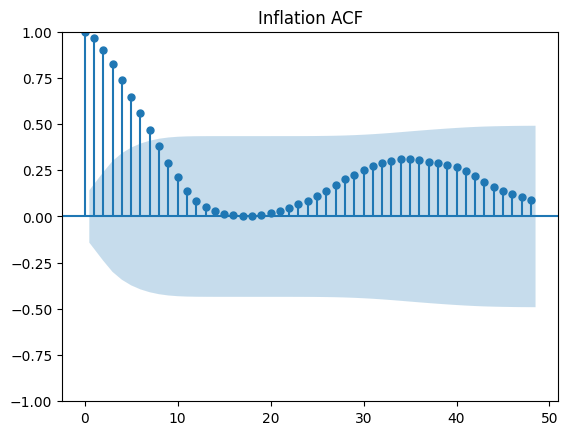

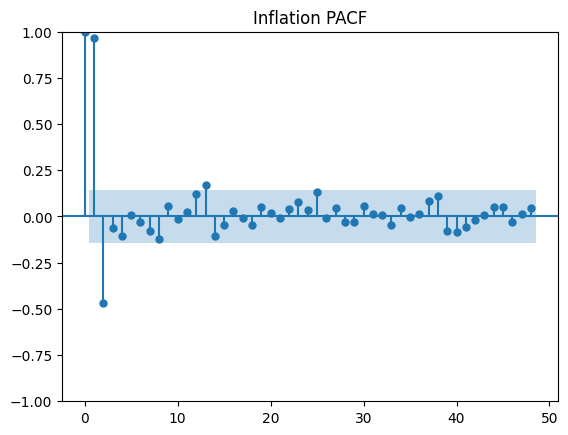

In [2]:
from utils import plot_autocorrelations, adf_test, split_fixed, split_ratio

train, test = split_ratio(df["Inflation"])
plot_autocorrelations(train)
adf_test(train)

In [13]:
from models import arima_grid_search
import warnings
warnings.filterwarnings("ignore")

model, data, model_list = arima_grid_search(train, test,0, possible_ar=[1,2,13], possible_ma=range(1,8), criteria="aic", log=False)

model_list


The Inflation is Stationary (p-value: 0.0485958) | (Statistic: -2.8729)


,text,order,aic,bic,mape,mae,mse
20,"ARIMA(13, 0, 7)","(13, 0, 7)",162.790566,234.455464,29.357095,1.458858,3.762259
15,"ARIMA(13, 0, 2)","(13, 0, 2)",172.353714,227.731136,27.020608,1.409394,3.983790
19,"ARIMA(13, 0, 6)","(13, 0, 6)",172.723160,241.130563,28.407509,1.436049,3.813803
13,"ARIMA(2, 0, 7)","(2, 0, 7)",173.565020,209.397469,30.113871,1.501486,3.902845
16,"ARIMA(13, 0, 3)","(13, 0, 3)",173.843021,232.477938,27.283940,1.409586,3.907145
17,"ARIMA(13, 0, 4)","(13, 0, 4)",176.036064,237.928476,28.222739,1.407790,3.706645
14,"ARIMA(13, 0, 1)","(13, 0, 1)",177.692056,229.811982,26.870154,1.431441,4.212566
12,"ARIMA(2, 0, 6)","(2, 0, 6)",178.162286,210.737239,32.049397,1.592648,4.248171
6,"ARIMA(1, 0, 7)","(1, 0, 7)",178.663669,211.238623,26.514421,1.366802,3.639976
18,"ARIMA(13, 0, 5)","(13, 0, 5)",179.767761,244.917668,28.779044,1.433615,3.690493


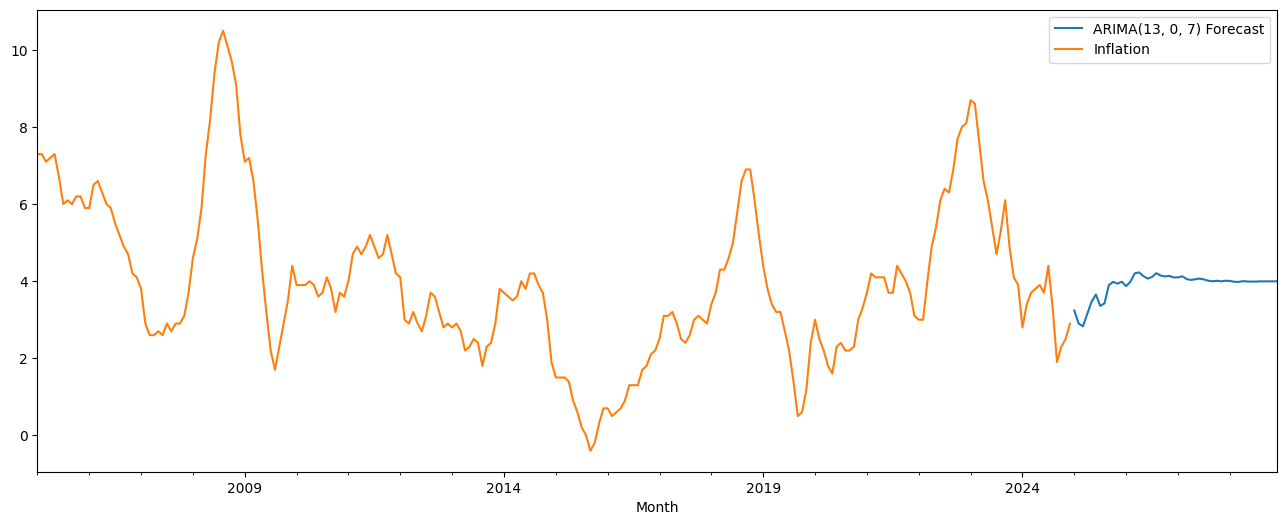

In [14]:
from models import ARIMA_forecast

ARIMA_forecast(df["Inflation"], len(test), order=data.order)

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# ARIMA(df, order=(4,0,7)).fit().get_forecast(12).summary_frame().plot(figsize=(18,6))
alpha = df.min().iloc[0] + 1
adf = df + alpha
data, l = boxcox(adf["Inflation"])

f = SARIMAX(data, order=(13,0,7)).fit().forecast(12)

f = inv_boxcox(f - alpha, l)

# f.plot(figsize=(18,6))
f

array([3.23448412, 3.11283911, 2.7653595 , 2.62661872, 2.70738244,
       2.82802149, 2.5623509 , 2.57214235, 2.98509753, 2.80842089,
       2.56782815, 2.68158835])